### Métodos de Aprendizaje en conjunto y Bosques Aleatorios

**Este notebook está basado en el libro Hands-On Machine Learning with Scikit-Learn and Tensorflow de Aurélien Géron**

#### Introducción

En esta sección trabajaremos con métodos que realizan tanto regresión y/o clasificación por medio de agregados de predicciones.  Estos grupos de predicciones son llamados 'Ensemble'.

Practicamente lo que realizamos es tener diferentes grupos de training y dividirlos en diferentes clasificadores (hablando de clasificación), como son diferentes árboles tendremos diferentes predicciones y tomar las predicciones que tienen mayor peso/voto.

El método de bosques aleatorios es una manera de realizar estos clasificadores o regresores.  Estos se utilizan luego de realizar diferentes corridas con diferentes métodos de algoritmos para combinarlos y tener un mejor predictor.

Algunos de los métodos de 'Ensemble' o Aprendizaje en conjunto son:
- Bagging
- Boosting
- Stacking
- Random Forest, entre algunos

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Clasificadores por Votación

In [5]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

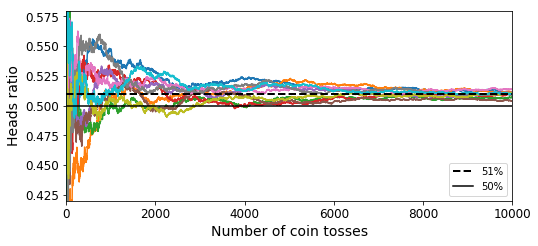

In [6]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])

plt.show()

Un clasificador de voto mayoritario opera como sigue:

Tenemos diferentes clasificadores: Regresión Lineal, Logística, KNN, RandomForest, etc con buena precisión.  Si deseamos mejorar la precisión deberemos agregar predicciones de cada clasificador, esto se le conoce como clasificador hard.

Si uno de ellos es malo pero los demás son buenos, en el global, la respuesta de la predicción mejorará.  Aún así si su predicción fue débil, en el conjunto pueden ser fuertes.  Estos se les conoce como 'weak learners' (a los individuales) y al conjunto 'strong learner'.

Del ejemplo anterior se observa que tirar al aire la moneda 10000 veces puede que consigamos más de la mitad del % como cara.  La manera de conseguir un mejor desempeño del algoritmo sería entrenar a varios sistemas con datos diferentes, sin embargo vemos que con la misma data, al acercarnos a números mayores tenemos siempre un 51%.

Dicho de otra manera, si entrenamos al sistema con diferentes set de datos no cometerán los mismos errores que si los entrenamos con el mismo set de datos a todos.

En tal caso, para que esto funcione a la perfección sería entrenar con diferentes datos y algoritmos.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [9]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [10]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


El codigo superior crea y entrena un clasificador en scikit-learn compuesto por diversos clasificadores
- Regresión Logistica
- Bosques Aleatorios
- Máquinas de Soporte Vectorial

Finalmente si observamos los resultados, individualmente ninguno supera al clasificador por votación, este los supera ligeramente, esta es la idea de este tipo de métodos.

In [11]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [12]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


Del código anterio, todos los clasificadores tienen en común una propiedad de 'predict' así que se puede hacer que prediga con el promedio de los clasificadores individuales ('soft-voting').  El 'soft-voting' da mejor precisión debido a que da más peso a las predicciones más confiables.

El parámetro 'voting=[hard, soft]' nos ayuda a realizar esta tarea.  Recordando los laboratorios anteriores la SVM puede correr más lento y tiene otro método de predicción que se activa con el hiperparámetro 'probability' a 'True'.

Finalmente note que el clasificador mejora en precisión.

# Aprendizaje en Conjunto por medio de 'Bagging'

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [15]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


En el código anterior se observa un método diferente.  Este utiliza, a diferencia del de 'voting' el mismo algoritmo para cada predictor pero entrenado con diferentes datasets (más bien con subsets del dataset).

El método aplicado de bagging hace un aprendizaje en conjutno de 500 árboles de decisiones con 100 instancias aleatorias con reemplazos ('bootstrap=true').  Como éste método permite el uso de varios cores del CPU el parámetro n_jobs nos permite los cores posibles, -1 para usar todos. 

Bagging = muestreo con reemplazos
Pasting = muestreo sin reemplazos

'Bagging' y 'pasting' permiten las instancias de entrenamiento ser meustreadas muchas veces sobre los predictores, sin embargo, bagging es la técnica que solo permite permite ser muestreada muchas veces sobre el mismo predictor.

El resulado de la nueva predicción es entonces la predicción más frecuente de todas como en el hard-voting.  Tiene alta 'bias' pero el agregar reducie 'bias' y varianza.

Este método también permite el training estar en múltiples cores lo que acelera el proceso de aprendizaje.

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

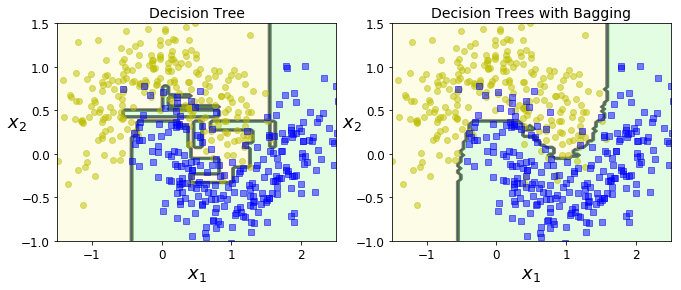

In [17]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

De la figura anterior observamos los resultados del árbol de decisión solitario y al lado derecho lo que sucede al utilizar un método de 'ensemble' de 500 árboles generalizando mejor el modelo.  Este tiene igual 'bias' que el dataset pero la varianza es menor como se mencionó anteriormente (hace los mismos errores en el training set, pero el límite de decisión es irregular).

# Bosques Aleatorios

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [19]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [21]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.976

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [23]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

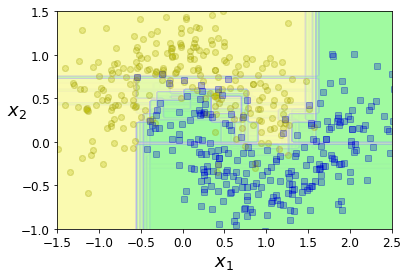

In [24]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.02, contour=False)

plt.show()

Los bosques aleatoreos son métodos de aprendizaje en conjunto entrenados por medio de bagging al maximo del training set.

La manera más rápida de utilizar metodos de 'ensemble' es con el RandomForestClassifier.  El código mostrado anteriormente es un clasificador de 500 árboles limitado a 16 nodos utilizando todos los núcleos de la PC.

El crecimiento del arbol es controlado por el método de DecisionTreeClassifier pero el de 'ensemble' es por medio del BaggingClassifier.  Este método de RandomForest busca la mejor característica aleatoria en el subset de características (alto bias y baja varianza).

Un bosque totalmente aleatorio se le conoce como 'Extra-Tree', la clase es similar 'ExtraTreesClassifier', hablando de clasificadores.  Para probar cual es mejor 'Random Forest' vs 'Extra-Trees' se debe utilizar validación cruzada.

## Evaluación de las muestras fuera del Bagging (Out-of-Bag)

In [25]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [26]:
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

Este resultado del oob_decision_function es la salida de probabilidades, en este caso de la clase positiva o negativa para cada caso.

In [27]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

El bias de Bagging ~> Pasting debido a como introduce en el dataset mientras entrena pero la corelación de varianza es reducida.  Normalmente los modelos de bagging tienen mejor resultado, pero se recomienda validar siempre el modelo cuando se pueda.

Bagging evalua las instancias (m instancias) del training set por muestreo tendiendo a $1 -\exp^{-1}\approx0.63212$, el resto se les conoce como 'out-of-bag', lo que quiere decir que podemos evaluar las instancias durante el training sin necesidad de validación cruzada, el valor 'oob_score=True realiza este trabajo.

Del resultado anterior se observa que el oob_score es del > 90%, lo que significa que tiene posibilidad mínima de estimado de > 90%.  Si se observa el accurracy_score, este resultado se asemeja bastante (91.2%).

Este tipo de clasificador también soporta muestreo de caracterísitcas (max_features y bootstrap_features, idem a max_samples y bootstrap).  Sirve para cuando tienes entradas estilo imagenes.

'Random Patches'   = Para mantener todas las imagenes...   bootstrap=False, max_samples=1.0

'Random Subspaces' = Para muestrear las características... bootstrap_features=True max_features=[menor a 1]

## Características Importantes

In [28]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [29]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

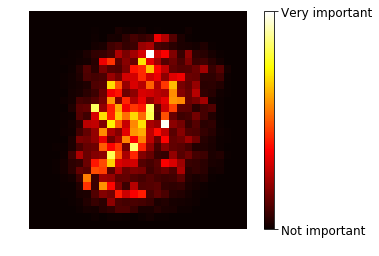

In [32]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])


plt.show()

Lo anterior muestra la medición de la importancia de características en el algoritmo de RF.  Este mide cuanto los nodos utilizan las características y reducen el nivel de impuridad por medio del promedio ponderado.

El total debe sumar 1.  Las importancias de las características se pueden ver en .feature_importances.  La imagen final es el resultado de las características dentro de los nodos.

# Boosting

Es un método de 'ensemble' que combina 'weak learner' para formar un 'strong learner'.  Entrena secuencialmente corrigiendo los predecesores.  El más popular se muestra a continuación

# AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

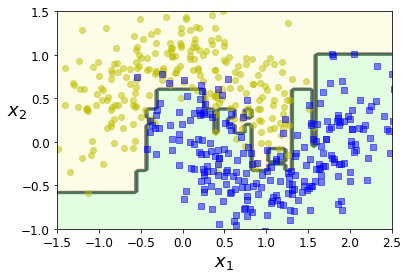

In [34]:
plot_decision_boundary(ada_clf, X, y)

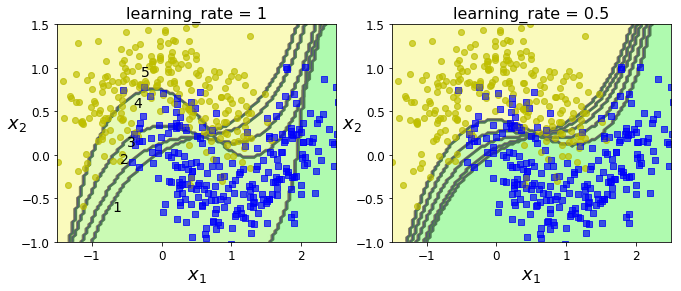

In [37]:
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)


plt.show()

In [38]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

El médoto de AdaBoost presta atención al 'underfitting' de sus predecesores mejorándolos.

Normalmente utilizamos un método a mejorar, p.e. 'DecisionTreeClassifier'.  Como habrá resultados que no son bien clasificados se incremente el peso (AdaBoost hará esto).  Seguido habrá un segundo entrenamiento actualizando los pesos y realizando predicciones sobre el trainig set, actualiza pesos y así sucesivamente; digamos que es un entrenador recursivo y consecutivo.

La gráfica final superior de la izquierda muestra el resultado de esta técnica, la de la derecha es la misma información con el lr = lr/2.  Este método es similar a bagging o pasting pero con diferentes pesos pues se van actualizando en cada instancia.

La versión multiclases de AdaBoost es el algoritmo 'SAMME', 'SAMME.R' nos da la probabilidad de las clases.

El código siguiente es de un clasificador de 200 estimadores y 1 nivel de árbol (lo que se conoce como 'Decision Stump')

# Gradient Boosting

In [39]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [41]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [42]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [43]:
X_new = np.array([[0.8]])

In [44]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [45]:
y_pred

array([0.75026781])

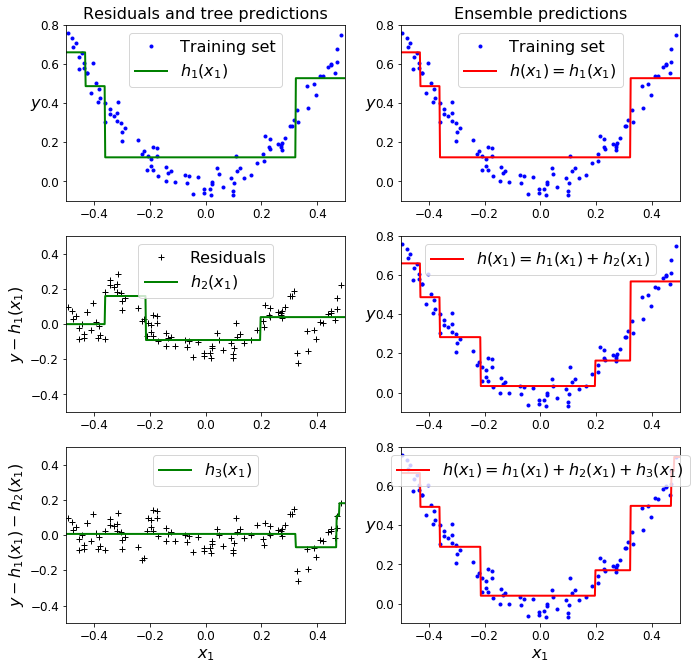

In [47]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

AdaBoost es uno de los métodos de 'boosting'.  Gradient Boosting como AdaBoost trabajan añadiendo secuencialmente predictores para corregir sus predecesores.  Sin embargo este no altera los pesos en cada iteracción sino que trata de hacer 'fit' a los nuevos predictores de errores residuales realizados por los predictores previos.

Del código anterior tenemos tres regresores en cascada de una señal de entrada aleatoria que al final hacen predicción de una variable.  Al final hacen un 'ensemble' de las predicciones.  

Las graficas izquierdas de salida muestran la predicción de los árboles y la gráfica derecha los resultados de las prediccines por 'ensemble'.

Las predicciones de la primera línea son iguales que el de ensemble pues es el primer arbol a evaluar.

La siguiente fila la predicción ya tiene un árbol más que añadir a la predicción así que esta aumenta.

En la tercera fila podemos ver que la predicción mejora.  Debajo se explica como hacer esto con scikitlearn de manera automática.

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

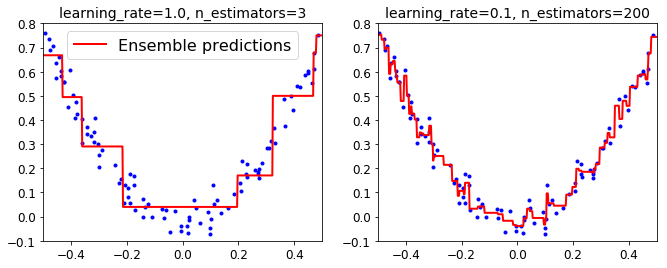

In [51]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

Los hiperparámetros max_depth y min_samples_leaf controlan el método de 'ensemble'.  Note que un método tiene mejor desempeño que el otro debido al learning_rate.  La técnica de regulación se llama 'shrinkage' o disminución de tamaño, este hace el algoritmo más lento pero mejora los resultados.

## Gradient Boosting with Early stopping

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=56,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
min_error = np.min(errors)

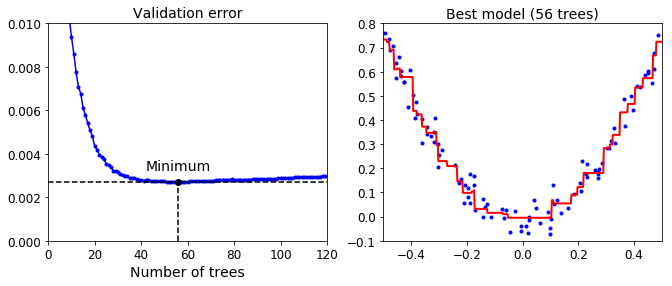

In [55]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

Para encontrar el número óptimo de árboles del regresor se puede utilizar una técnica llamada 'early stop'.  Del código anterior tenemos 120 árboles que miden sus errores para cada caso de entrenamiento  y así encontrar el árbol óptimo para el training.

La grafica izquierda muestra los errores de validación y la derecha las predicciones utilizando el mejor modelo.

In [56]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [57]:
print(gbrt.n_estimators)

61


In [58]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


Otra manera de realizar 'early stop' es por medio del primero ajustando el hiperparámetro 'warm_start=True' para guardar los resultados de los árboles y lo siguiente realizar fit para luego realizar una rutina que haga el paro automático del entrenamiento si este aumenta.

Este método también soporta un hiperparámetro llamado 'subsample' que especifica la fracción de las instancias de entrenamiento, si lo ajustamos a 0.3 será el 30% de las instancias de training que serán seleccionadas aleatoriamente y obviamente tendremos alto bias y baja varianza.  Esta técnica es conocida como 'Stochastic Gradient Boosting'.

Mencionaremos este método de 'ensemble' llamado stacking.  Stacking o Stacked Generalization hace algo parecido a 'voting' que agrega predicciones a todos los predictores de 'ensemble' pero antes de agragarlos entrena a los predictores. Para aclarar más:
- Se poseen 3 predictores, p.e.
- Cada predictor da un resultado poco difernete
- El 'meta learner' unifica estas predicciones y da un valor final

Para entrenar el 'meta learner':
- Dividimos el training set en dos sub grupos 
- El primer subgrupo se usa para hacer predicciones
- Se realizan, p.e., las 3 predicciones
- La salida se utiliza en el sub grupo no usado para hacer predicciones
- Las predicciones se unifican y combinan en una sola

La técnicas se puede utilzar para varios grupos de 'meta learners' diferentes.  Lo que se debe hacer es dividir el training set en diferentes subsets, el primero usado para entrenar la primera capa, el segundo usado para crear training set de la tercera capa y asi sucesivamente para que la última capa sea la que haga las prediciones finales.

## Ejemplo de Uso de XGBoost

In [65]:
!pip install xgboost

In [66]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [67]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

[14:52:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.0028512559726563943


In [68]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

[14:52:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.286719
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.258221
[2]	validation_0-rmse:0.232634
[3]	validation_0-rmse:0.210526
[4]	validation_0-rmse:0.190232
[5]	validation_0-rmse:0.172196
[6]	validation_0-rmse:0.156394
[7]	validation_0-rmse:0.142241
[8]	validation_0-rmse:0.129789
[9]	validation_0-rmse:0.118752
[10]	validation_0-rmse:0.108388
[11]	validation_0-rmse:0.100155
[12]	validation_0-rmse:0.09208
[13]	validation_0-rmse:0.084791
[14]	validation_0-rmse:0.078699
[15]	validation_0-rmse:0.073248
[16]	validation_0-rmse:0.069391
[17]	validation_0-rmse:0.066277
[18]	validation_0-rmse:0.063458
[19]	validation_0-rmse:0.060326
[20]	validation_0-rmse:0.0578
[21]	validation_0-rmse:0.055643
[22]	validation_0-rmse:0.053943
[23]	validation_0-rmse:0.053138
[24]	validation_0

In [73]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

[14:58:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:14] WARNI

[14:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:16] WARNI

In [70]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

67.1 ms ± 5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#  Parte 1 34%

- Utilice scikit-learn para cargar el dataset de load_wine
- Entrene los siguientes clasificadores
  - RandomForest
  - SVM
  - Extra-Tree
- Calcule la precisión de las predicciones
- Ahora utilice un método de 'ensemble' que supere la precisión encontrada anteriormente.

# Parte 2 33%

- Utilice un regresor de GradientBoost con los hiperparámetros:
  - max_depth=3, n_estimators=4, learning_rate=1.8, random_state=42
- Grafique las predicciones
- Trate de mejorar las predicciones debido a que hay underfitting
- Grafique nuevamente las predicciones

# Parte 3 33%

- Utilizando el dataset de load_boston de scikit-learn
- Entrene para encontrar el número de árboles necesarios mínimos por medio de 'early stopping'